# Cleaning and Analyzing Employee Exit Surveys

The goal of this project is to clean and analyze employee exit surveys compiled from two data sets, [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey).

We would like to examine relationships between the type of employee resignation and the length of employment, as well as the age of the employee. The goal is to find if employees are resigning because they are dissatisfied, and if so, what each demographic may be dissatisfied with.

### First Peek

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

#### DETE

In [2]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
dete_survey['Region'].value_counts()

Metropolitan                135
Central Office              130
South East                  108
Not Stated                  105
Darling Downs South West     95
Central Queensland           84
North Coast                  75
North Queensland             53
Far North Queensland         37
Name: Region, dtype: int64

Shape: 822 Rows, 56 Columns

The majority of this data is in a string-like format or stored as a boolean. Some date columns will be able to be converted, others will need further examination.

There is also a range of data points with missing values, some with large percentages that can likely be dropped, others with only handfuls which will need further exploration to see if they could be dropped or replaced. Further, some data found in region is 'Not State' rather than NaN, let's fix this below.

In [5]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

#### TAFE

In [6]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Shape: 702 Rows, 72 Columns

Nearly all of this data is in a object or string type format. Some data will need conversion, likely the date and time or age.

Similarly to the DETE survey, there is also a range of data points with missing values, some with large percentages that can likely be dropped, others with only handfuls which will need further exploration to see if they could be dropped or replaced.

### Trim the Fat

We are able to drop several columns from these sets as they do not relate to our mission.

#### DETE

In [8]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [9]:
dete_survey['Professional Development'].value_counts()

A     413
SA    184
N     103
D      60
SD     33
M      15
Name: Professional Development, dtype: int64

In [10]:
dete_survey['Health & Safety'].value_counts()

A     386
N     153
SA    141
D      50
SD     35
M      28
Name: Health & Safety, dtype: int64

In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

The choice to drop these columns from the data set is due to the information they are providing. All the columns indicied from 28 - 49 have values A, N, SA, D, SD, and M, which are likely indicators if the company has these Available, Not Available, or somewhere in between. Although this data might be an invisible indicator of dissatisfaction, there is no verbose connection and can therefor be dropped.

#### TAFE

In [12]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [13]:
tafe_survey['Main Factor. Which of these was the main factor for leaving?'].value_counts()

Dissatisfaction with %[Institute]Q25LBL%    23
Job Dissatisfaction                         22
Other                                       18
Career Move - Private Sector                16
Interpersonal Conflict                       9
Career Move - Public Sector                  8
Maternity/Family                             6
Career Move - Self-employment                4
Ill Health                                   3
Travel                                       2
Study                                        2
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int64

In [14]:
tafe_survey['Workplace. Topic:Would you recommend the Institute as an employer to others?'].value_counts()

Yes    416
No     165
Name: Workplace. Topic:Would you recommend the Institute as an employer to others?, dtype: int64

In [15]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

The choice to drop these columns from the data set is due to the information they are providing. These columns are generally asking yes/no and true/false questions, neither of which are directly related to answering if the employee of a certain age or seniority were dissatisfied.

### Standardize Columns

Many of the columns between both data sets provide the same information and since we will be combining them together it is best to make the column titles the same name and same case.

#### DETE

In [57]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()

dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

#### TAFE

In [17]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [18]:
new_cols = {'Record ID':'id',
            'CESSATION YEAR':'cease_date',
            'Reason for ceasing employment':'separationtype',
            'Gender. What is your Gender?':'gender',
            'CurrentAge. Current Age':'age',
            'Employment Type. Employment Type':'employment_status',
            'Classification. Classification': 'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
            'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'
           }

tafe_survey_updated = tafe_survey_updated.rename(columns=new_cols)

In [19]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [20]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Having succinct column names will make the data much easier to work with and having titles standardized across both data sets will make it easier to merge them together.

### Further Pruning

Before combining these tables, however, we can still drop more data unrelated to employees whom resigned their position. This can be done by looking at the separationtype column and dropping all but the Resignation-based values.

In [21]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [22]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Choosing data where employees resigned:

In [23]:
dete_resignations = dete_survey_updated.loc[dete_survey_updated['separationtype'].str.contains(r'Resignation')].copy()
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'].str.contains(r'Resignation', na=False)].copy()

In [24]:
dete_resignations['separationtype'].value_counts()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

### Sanity Check

Let's make sure our data isn't actually a bad sample. We can check start and end dates as a decent indicator that the data is okay to use. Specifically, if the cease date is prior to the start date there would be bad data. It is also unlikely the start date would be before 1940, as most people start working in their 20s.

#### Dete

- cease_date

In [25]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2012      1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [26]:
pattern = r'([1-2][0-9]{3})'
year = dete_resignations['cease_date'].str.extract(pattern)
dete_resignations['cease_date'] = year

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [27]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [28]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

- dete_start_date

In [29]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [43]:
err = dete_resignations['cease_date'] >= dete_resignations['dete_start_date']
err = dete_resignations[err == False]
err

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
16,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
39,40,Resignation-Move overseas/interstate,2012.0,NaN,NaN,Teacher,NaN,Central Queensland,NaN,Permanent Full-time,...,True,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
106,107,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,Central Office,Training and Tertiary Education Queensland,Temporary Part-time,...,True,False,False,Female,46-50,NaN,NaN,Yes,NaN,NaN
140,141,Resignation-Other employer,2012.0,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN
196,197,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,North Queensland,NaN,Permanent Part-time,...,False,False,True,Female,46-50,NaN,NaN,NaN,NaN,NaN
288,289,Resignation-Move overseas/interstate,2013.0,NaN,NaN,Public Servant,AO5-AO7,Central Office,Education Queensland,Permanent Full-time,...,False,True,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
291,292,Resignation-Other employer,2013.0,NaN,NaN,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
293,294,Resignation-Move overseas/interstate,2012.0,NaN,NaN,Schools Officer,NaN,South East,NaN,Permanent Part-time,...,False,False,False,NaN,61 or older,NaN,NaN,NaN,NaN,NaN
301,302,Resignation-Other employer,2012.0,NaN,NaN,School Administrative Staff,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
343,344,Resignation-Other employer,2012.0,NaN,NaN,School Administrative Staff,NaN,Metropolitan,NaN,Permanent Part-time,...,False,False,True,Female,41-45,NaN,NaN,NaN,NaN,Yes


DETE data passes this sanity check. All rows where the cease date is not greater than or equal to the start date have values of NaN for either. I.e. Any dates that are included are realistic.

#### TAFE

In [31]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [32]:
tafe_resignations['cease_date'] = tafe_resignations['cease_date'].astype(float)

TAFE data passes this sanity check!

Overall the data relating to year is good to go. This is excellent as we need to find the length of employee service. This column already exists in the tafe data, named as `institute_service`, however, we will need to calculate this as a column from the dete data.

In [44]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

### Data Made Concise

#### TAFE

In [45]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [46]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [47]:
def update_vals(val):
    '''only return values of True, False, or NaN'''
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [49]:
tfn = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [50]:
tafe_resignations['dissatisfied'] = tfn.any(axis=1, skipna=False)

In [54]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [61]:
tafe_resignations_up = tafe_resignations.copy()

#### DETE

In [55]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [56]:
dete_resignations['physical_work_environment'].value_counts()

False    305
True       6
Name: physical_work_environment, dtype: int64

In [59]:
dis_cols = ['job_dissatisfaction',
            'dissatisfaction_with_the_department',
            'physical_work_environment',
            'lack_of_recognition',
            'lack_of_job_security',
            'work_location',
            'employment_conditions',
            'work_life_balance',
            'workload']
dete_resignations['dissatisfied'] = dete_resignations[dis_cols].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

These columns are chosen because they are all things that relate to employee (dis)satisifaction that are direct result of the job or company and not within the employees control.

In [60]:
dete_resignations_up = dete_resignations.copy()

### Time to Combine

Now that our data has been dropped, renamed, consolidated, and indicated, it is finally time to combine the two sets. We can aggregate this data based on the employees's length of service. i.e. `institute_service`.

Maintain data origin by adding the institute as a column the data originated.

In [62]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [64]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [70]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [71]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [72]:
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

Any columns with less than 500 non-null values were dropped as they don't directly pertain to age, dissatisfaction, or service length directly and include a large percentage of missing values.

It is a good idea at this point to inspect the values in the columns of our remaining data. Since the goal is to sort by the institute_service column, let's start there.

In [77]:
combined['institute_service'].value_counts(dropna=False)

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
10.0                   6
14.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
21.0                   3
32.0                   3
39.0                   3
19.0                   3
36.0                   2
30.0                   2
25.0                   2
26.0                   2
28.0                   2


### Service Year as Ranges

Since this column has various data forms, we must convert one form to another. In this case, some entries have ranges and others are actual year amounts. Since our precision is limited by the year ranges, we will convert the year amounts into ranges based on the categories as outlined [here](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage).

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [91]:
combined['institute_service'] = combined['institute_service'].astype('str')

pattern = r'([0-9]+)'
combined['institute_service'] = combined['institute_service'].str.extract(pattern)

combined['institute_service'] = combined['institute_service'].astype('float')
combined['institute_service'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

In [84]:
def serv_range(val):
    '''map value to range of experience'''
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

In [90]:
combined['service_cat'] = combined['institute_service'].apply(serv_range)

### Analysis is Afoot

Now that the data is sufficiently cleaned, we can start analysis. First thing to do is aggregate the dissatisfied column and calculate numbers and percentages of each group from there.

In [92]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [93]:
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)

In [96]:
ue_p = combined.pivot_table(index='service_cat', values='dissatisfied')

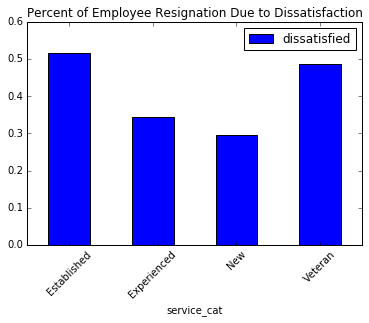

In [103]:
%matplotlib inline

ue_p.plot(kind='bar', title='Percent of Employee Resignation Due to Dissatisfaction', rot=45)

From this very initial analysis it is apparent more employees resign because they are dissatisfied rather than other reasons, the longer they have worked at the same place.

There are definitely other factors at play which were not included all the way through this analysis. Something else to analyze would be the exact type of thing each group is dissatisfied with to start minimizing overal dissatisfaction.

- Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
- Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
- Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?